In [1]:
from tensorflow.keras.datasets.mnist import load_data

mnist = load_data()
(x_train, y_train), (x_test, y_test) =  mnist
x_flatten_train = x_train.reshape(60000, 28*28)
x_flatten_test = x_test.reshape(10000, 28*28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [2]:
x_flatten_train.shape

(60000, 784)

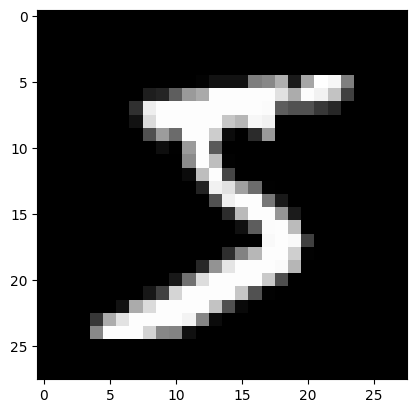

In [3]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[0], cmap="gray")

In [4]:
x_train[0].shape

(28, 28)

In [5]:
y_train[0]

5

In [6]:
# tf.keras.Sequential(
#     layers=None, trainable=True, name=None
# )

# tf.keras.layers.ReLU(
#     max_value=None, negative_slope=0.0, threshold=0.0, **kwargs
# )
from tensorflow.keras import Sequential , Input
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import ReLU ,Dense ,Softmax
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical


y_train_onhot = to_categorical(y_train , num_classes=10)
y_test_onhot = to_categorical(y_test , num_classes=10)

relu = ReLU()
softmax = Softmax()

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512 , activation=relu))
model.add(Dense(10 , activation=softmax))


categorical_crossentropy = CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='categorical_crossentropy'
)

model.compile(loss=categorical_crossentropy , optimizer='adam', metrics=['accuracy'])

model.fit(x_flatten_train , y_train_onhot , epochs=20 , batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8504 - loss: 11.6714
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9554 - loss: 0.5136
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9693 - loss: 0.2458
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9744 - loss: 0.1737
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9767 - loss: 0.1489
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9785 - loss: 0.1448
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9789 - loss: 0.1599
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9778 - loss: 0.1392
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9787 - loss: 0.1407
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9773 - loss: 0.1559
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9814 - loss: 0.1211
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/ste

In [7]:
import pprint
pprint.pprint(x_train[55])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
model.evaluate(x_flatten_test, y_test_onhot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9660 - loss: 0.6022


[0.47188931703567505, 0.9710000157356262]

In [11]:
model.predict(x_flatten_test)[15]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.0000000e+00, 0.0000000e+00, 8.7691583e-25, 9.9999642e-01,
       0.0000000e+00, 3.6232993e-06, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [13]:
y_test[15]

5